(odu_v3)=
```{raw} html
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

# Exchangeability and Bayesian Updating

```{contents} Contents
:depth: 2
```

## Overview

This lecture studies  learning
via Bayes' Law.

We touch foundations of Bayesian statistical inference invented by Bruno DeFinetti {cite}`definetti`.

The relevance of DeFinetti's work for economists is presented forcefully
in chapter 11 of {cite}`Kreps88` by David Kreps.

An example  that we study in this lecture  is a key component of {doc}`this lecture <odu>` that augments the
{doc}`classic <mccall_model>`  job search model of McCall
{cite}`McCall1970` by presenting an unemployed worker with a statistical inference problem.

Here we create  graphs that illustrate the role that  a  likelihood ratio
plays in  Bayes' Law.

We'll use such graphs to provide insights into  mechanics driving outcomes in {doc}`this lecture <odu>` about learning in an augmented McCall job
search model.

Among other things, this lecture discusses  connections between the statistical concepts of sequences of random variables that are

- independently and identically distributed
- exchangeable (also known as *conditionally* independently and identically distributed)

Understanding these concepts is essential for appreciating how Bayesian updating
works.

You can read about exchangeability [here](https://en.wikipedia.org/wiki/Exchangeable_random_variables).

Because another term for **exchangeable** is **conditionally independent**,  we want   to convey an answer to the question *conditional on what?*

We also tell why  an assumption of independence precludes  learning while 
an assumption of conditional independence makes learning possible.

Below, we'll often use

- $W$ to denote a random variable
- $w$ to denote a particular realization of a random variable $W$

Let’s start with some imports:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
from numba import njit, vectorize
from math import gamma
import scipy.optimize as op
from scipy.integrate import quad
import numpy as np

## Independently and Identically Distributed

We begin by looking at the notion of an  **independently and identically  distributed sequence** of random variables.

An independently and identically distributed sequence is often abbreviated as IID.

Two notions are involved

- **independence** 

- **identically distributed**

A sequence $W_0, W_1, \ldots$ is **independently distributed** if the joint probability density
of the sequence is the **product** of the densities of the  components of the sequence.

The sequence $W_0, W_1, \ldots$ is **independently and identically distributed** (IID) if in addition the marginal
density of $W_t$ is the same for all $t =0, 1, \ldots$.

For example,  let $p(W_0, W_1, \ldots)$ be the **joint density** of the sequence and
let $p(W_t)$ be the **marginal density** for a particular $W_t$ for all $t =0, 1, \ldots$.

Then the joint density of the sequence $W_0, W_1, \ldots$ is IID if

$$
p(W_0, W_1, \ldots) =  p(W_0) p(W_1) \cdots
$$

so that the joint density is the product of a sequence of identical marginal densities.

### IID Means Past Observations Don't Tell Us Anything About Future Observations

If a sequence is random variables is IID, past information provides no information about future realizations.

Therefore, there is **nothing to learn** from the past  about the future.

To understand these statements, let the joint distribution of a sequence of random variables $\{W_t\}_{t=0}^T$
that is not necessarily IID, be

$$
p(W_T, W_{T-1}, \ldots, W_1, W_0)
$$

Using the laws of probability, we can always factor such a joint density into a product of conditional densities:

$$
\begin{aligned}
  p(W_T, W_{T-1}, \ldots, W_1, W_0)    = & p(W_T | W_{T-1}, \ldots, W_0) p(W_{T-1} | W_{T-2}, \ldots, W_0) \cdots  \cr
  & \quad \quad \cdots p(W_1 | W_0) p(W_0)
\end{aligned}
$$

In general,

$$
p(W_t | W_{t-1}, \ldots, W_0)   \neq   p(W_t)
$$

which states that the **conditional density** on the left side does not equal the **marginal density** on the right side.

But in the special IID case,

$$
p(W_t | W_{t-1}, \ldots, W_0)   =  p(W_t)
$$

and partial history $W_{t-1}, \ldots, W_0$ contains no information about the probability of $W_t$.

So in the IID case, there is **nothing to learn** about the densities of future random variables from past random variables.

In the general case, there is something to learn from observations of past random variables.

We turn next to an instance of this general case.

Please watch for what can be  learned from the past and when.

## A Setting in Which Past Observations Are Informative

Let $\{W_t\}_{t=0}^\infty$ be a sequence of nonnegative
scalar random variables with a joint probability distribution
constructed as follows.

There are two distinct cumulative distribution functions $F$ and $G$ that have  densities $f$ and $g$, respectively,  for a nonnegative scalar random
variable $W$.

Before the start of time, say at time $t= -1$, “nature” once and for
all selects **either** $f$ **or** $g$.

Thereafter at each time
$t \geq 0$, nature  draws a random variable $W_t$ from the selected
distribution.

So  the data are permanently generated as independently and identically distributed (IID) draws from **either** $F$ **or**
$G$.

We could say that *objectively* the probability that the data are generated as draws from $F$ is either $0$
or $1$.

We now drop into this setting a partially informed decision maker who knows

- both $F$ and $G$, and

- but not the $F$ or $G$ that nature drew once-and-for-all at $t = -1$ 

So our decision maker does not know which of the two distributions nature selected.

The decision maker summarizes his ignorance with a **subjective probability**
$\tilde \pi$ and reasons as if  nature had selected $F$ with probability
$\tilde \pi \in (0,1)$ and
$G$ with probability $1 - \tilde \pi$.

Thus, we  assume that the decision maker

- **knows** both $F$ and $G$
- **doesn't know** which of these two distributions that nature has drawn
- expresses  his ignorance by acting  as if or **thinking** that nature chose distribution $F$ with probability $\tilde \pi \in (0,1)$ and distribution
  $G$ with probability $1 - \tilde \pi$
- at date $t \geq 0$ knows  the partial history $w_t, w_{t-1}, \ldots, w_0$

To proceed, we want to know the decision maker's belief about the joint distribution of the partial history.

We'll discuss that next and in the process describe the concept of **exchangeability**.

## Relationship Between IID and Exchangeable

Conditional on nature selecting $F$, the joint density of the
sequence $W_0, W_1, \ldots$ is

$$
f(W_0) f(W_1) \cdots
$$

Conditional on nature selecting $G$, the joint density of the
sequence $W_0, W_1, \ldots$ is

$$
g(W_0) g(W_1) \cdots
$$

Thus,  **conditional on nature having selected** $F$, the
sequence $W_0, W_1, \ldots$ is independently and
identically distributed.

Furthermore,  **conditional on nature having
selected** $G$, the sequence $W_0, W_1, \ldots$ is also
independently and identically distributed.

But what about the **unconditional distribution** of a partial history?

The unconditional distribution of $W_0, W_1, \ldots$ is
evidently

```{math}
:label: eq_definetti

h(W_0, W_1, \ldots ) \equiv \tilde \pi [f(W_0) f(W_1) \cdots \ ] + ( 1- \tilde \pi) [g(W_0) g(W_1) \cdots \ ]
```

Under the unconditional distribution $h(W_0, W_1, \ldots )$, the
sequence $W_0, W_1, \ldots$ is **not** independently and
identically distributed.

To verify this claim, it is sufficient to notice, for example, that

$$
h(W_0, W_1) = \tilde \pi f(W_0)f (W_1) + (1 - \tilde \pi) g(W_0)g(W_1) \neq
              (\tilde \pi f(W_0) + (1-\tilde \pi) g(W_0))(
               \tilde \pi f(W_1) + (1-\tilde \pi) g(W_1))
$$

Thus, the conditional distribution

$$
h(W_1 | W_0) \equiv \frac{h(W_0, W_1)}{(\tilde \pi f(W_0) + (1-\tilde \pi) g(W_0))}
 \neq ( \tilde \pi f(W_1) + (1-\tilde \pi) g(W_1))
$$

This means that  random variable  $W_0$ contains information about random variable  $W_1$.

So there is something to learn.

But what and how?

## Exchangeability

While the sequence $W_0, W_1, \ldots$ is not IID, it can be verified that it is
**exchangeable**, which means that the  ``re-ordered'' joint distributions $h(W_0, W_1)$ and $h(W_1, W_0)$
satisfy

$$
h(W_0, W_1) = h(W_1, W_0)
$$

and so on.

More generally, a sequence of random variables is said to be **exchangeable** if  the  joint probability distribution
for a sequence does not change when the positions in the sequence in which finitely many  of random variables
appear are altered.

Equation {eq}`eq_definetti` represents our instance of an exchangeable joint density over a sequence of random
variables  as a **mixture**  of  two IID joint densities over a sequence of random variables.

For a Bayesian statistician, the mixing parameter $\tilde \pi \in (0,1)$ has a special interpretation
as a **prior probability** that nature selected probability distribution $F$.

DeFinetti {cite}`definetti` established a related representation of an exchangeable process created by mixing
sequences of IID Bernoulli random variables with parameter $\theta \in (0,1)$ and mixing probability density $\pi(\theta)$
 that a Bayesian statistician would interpret as a prior over the unknown
Bernoulli parameter $\theta$.

## Bayes' Law

We noted above that in our example model there is something to learn about about the future from past data drawn
from our particular instance of a process that is exchangeable but not IID.

But how can we learn?

And about what?

The answer to the *about what* question is  $\tilde \pi$.

The answer to the *how* question is to use  Bayes' Law.

Another way to say *use Bayes' Law* is to say *from a (subjective) joint distribution, compute an appropriate conditional distribution*.

Let's dive into Bayes' Law in this context.

Let $q$ represent the distribution that nature actually draws $w$ from
 from and let

$$
\pi = \mathbb{P}\{q = f \}
$$

where we regard $\pi$ as a decision maker's **subjective probability**  (also called a **personal probability**).

Suppose that at $t \geq 0$, the decision maker has  observed a history
$w^t \equiv [w_t, w_{t-1}, \ldots, w_0]$.

We let

$$
\pi_t  = \mathbb{P}\{q = f  | w^t \}
$$

where we adopt the convention

$$
\pi_{-1}  = \tilde \pi
$$

The distribution of $w_{t+1}$ conditional on $w^t$ is then

$$
\pi_t f + (1 - \pi_t) g .
$$

Bayes’ rule for updating $\pi_{t+1}$ is

$$
\pi_{t+1} = \frac{\pi_t f(w_{t+1})}{\pi_t f(w_{t+1}) + (1 - \pi_t) g(w_{t+1})}
$$ (eq_Bayes102)


Equation {eq}`eq_Bayes102` follows from Bayes’ rule, which
tells us that

$$
\mathbb{P}\{q = f \,|\, W = w\}
= \frac{\mathbb{P}\{W = w \,|\, q = f\}\mathbb{P}\{q = f\}}
{\mathbb{P}\{W = w\}}
$$

where

$$
\mathbb{P}\{W = w\} = \sum_{a \in \{f, g\}} \mathbb{P}\{W = w \,|\, q = a \} \mathbb{P}\{q = a \}
$$

## More Details about Bayesian Updating

Let's stare at and rearrange Bayes' Law as represented in equation {eq}`eq_Bayes102` with the aim of understanding
how the **posterior** probability $\pi_{t+1}$ is influenced by the **prior** probability $\pi_t$ and the **likelihood ratio**

$$
l(w) = \frac{f(w)}{g(w)}
$$

It is convenient for us to rewrite the updating rule {eq}`eq_Bayes102` as

$$
\pi_{t+1}   =\frac{\pi_{t}f\left(w_{t+1}\right)}{\pi_{t}f\left(w_{t+1}\right)+\left(1-\pi_{t}\right)g\left(w_{t+1}\right)}
    =\frac{\pi_{t}\frac{f\left(w_{t+1}\right)}{g\left(w_{t+1}\right)}}{\pi_{t}\frac{f\left(w_{t+1}\right)}{g\left(w_{t+1}\right)}+\left(1-\pi_{t}\right)}
    =\frac{\pi_{t}l\left(w_{t+1}\right)}{\pi_{t}l\left(w_{t+1}\right)+\left(1-\pi_{t}\right)}
$$

This implies that

```{math}
:label: eq_Bayes103

\frac{\pi_{t+1}}{\pi_{t}}=\frac{l\left(w_{t+1}\right)}{\pi_{t}l\left(w_{t+1}\right)+\left(1-\pi_{t}\right)}\begin{cases} >1 &
\text{if }l\left(w_{t+1}\right)>1\\
\leq1 & \text{if }l\left(w_{t+1}\right)\leq1
\end{cases}
```

Notice how the likelihood ratio and the prior interact to determine whether an observation $w_{t+1}$ leads the decision maker
to increase or decrease the subjective probability he/she attaches to distribution $F$.

When the likelihood ratio $l(w_{t+1})$ exceeds one, the observation $w_{t+1}$ nudges the probability
$\pi$ put on distribution $F$ upward,
and when the likelihood ratio $l(w_{t+1})$ is less that  one, the observation $w_{t+1}$ nudges $\pi$ downward.

Representation {eq}`eq_Bayes103` is the foundation of some graphs that we'll use to display the dynamics of
$\{\pi_t\}_{t=0}^\infty$ that are  induced by
Bayes' Law.

We’ll plot $l\left(w\right)$ as a way to enlighten us about how
learning – i.e., Bayesian updating of the probability $\pi$ that
nature has chosen distribution $f$ – works.

To create the Python infrastructure to do our work for us,  we construct a wrapper function that displays informative graphs
given parameters of $f$ and $g$.

In [2]:
@vectorize
def p(x, a, b):
    "The general beta distribution function."
    r = gamma(a + b) / (gamma(a) * gamma(b))
    return r * x ** (a-1) * (1 - x) ** (b-1)

def learning_example(F_a=1, F_b=1, G_a=3, G_b=1.2):
    """
    A wrapper function that displays the updating rule of belief π,
    given the parameters which specify F and G distributions.
    """

    f = njit(lambda x: p(x, F_a, F_b))
    g = njit(lambda x: p(x, G_a, G_b))

    # l(w) = f(w) / g(w)
    l = lambda w: f(w) / g(w)
    # objective function for solving l(w) = 1
    obj = lambda w: l(w) - 1

    x_grid = np.linspace(0, 1, 100)
    π_grid = np.linspace(1e-3, 1-1e-3, 100)

    w_max = 1
    w_grid = np.linspace(1e-12, w_max-1e-12, 100)

    # the mode of beta distribution
    # use this to divide w into two intervals for root finding
    G_mode = (G_a - 1) / (G_a + G_b - 2)
    roots = np.empty(2)
    roots[0] = op.root_scalar(obj, bracket=[1e-10, G_mode]).root
    roots[1] = op.root_scalar(obj, bracket=[G_mode, 1-1e-10]).root

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    ax1.plot(l(w_grid), w_grid, label='$l$', lw=2)
    ax1.vlines(1., 0., 1., linestyle="--")
    ax1.hlines(roots, 0., 2., linestyle="--")
    ax1.set_xlim([0., 2.])
    ax1.legend(loc=4)
    ax1.set(xlabel='$l(w)=f(w)/g(w)$', ylabel='$w$')

    ax2.plot(f(x_grid), x_grid, label='$f$', lw=2)
    ax2.plot(g(x_grid), x_grid, label='$g$', lw=2)
    ax2.vlines(1., 0., 1., linestyle="--")
    ax2.hlines(roots, 0., 2., linestyle="--")
    ax2.legend(loc=4)
    ax2.set(xlabel='$f(w), g(w)$', ylabel='$w$')

    area1 = quad(f, 0, roots[0])[0]
    area2 = quad(g, roots[0], roots[1])[0]
    area3 = quad(f, roots[1], 1)[0]

    ax2.text((f(0) + f(roots[0])) / 4, roots[0] / 2, f"{area1: .3g}")
    ax2.fill_between([0, 1], 0, roots[0], color='blue', alpha=0.15)
    ax2.text(np.mean(g(roots)) / 2, np.mean(roots), f"{area2: .3g}")
    w_roots = np.linspace(roots[0], roots[1], 20)
    ax2.fill_betweenx(w_roots, 0, g(w_roots), color='orange', alpha=0.15)
    ax2.text((f(roots[1]) + f(1)) / 4, (roots[1] + 1) / 2, f"{area3: .3g}")
    ax2.fill_between([0, 1], roots[1], 1, color='blue', alpha=0.15)

    W = np.arange(0.01, 0.99, 0.08)
    Π = np.arange(0.01, 0.99, 0.08)

    ΔW = np.zeros((len(W), len(Π)))
    ΔΠ = np.empty((len(W), len(Π)))
    for i, w in enumerate(W):
        for j, π in enumerate(Π):
            lw = l(w)
            ΔΠ[i, j] = π * (lw / (π * lw + 1 - π) - 1)

    q = ax3.quiver(Π, W, ΔΠ, ΔW, scale=2, color='r', alpha=0.8)

    ax3.fill_between(π_grid, 0, roots[0], color='blue', alpha=0.15)
    ax3.fill_between(π_grid, roots[0], roots[1], color='green', alpha=0.15)
    ax3.fill_between(π_grid, roots[1], w_max, color='blue', alpha=0.15)
    ax3.hlines(roots, 0., 1., linestyle="--")
    ax3.set(xlabel='$\pi$', ylabel='$w$')
    ax3.grid()

    plt.show()

Now we'll create a group of graphs that illustrate  dynamics induced by Bayes' Law.

We'll begin with Python function default values of various objects, then change them in a subsequent example.

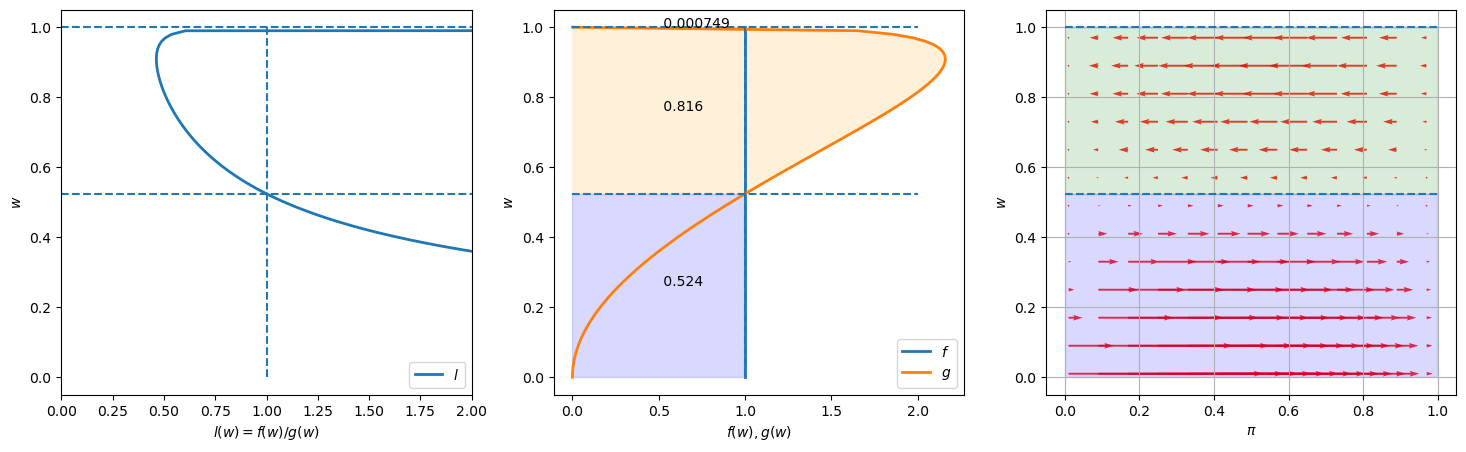

In [3]:
learning_example()

Please look at the three graphs above created for an instance in which $f$ is a uniform distribution on $[0,1]$
(i.e., a Beta distribution with parameters $F_a=1, F_b=1$), while  $g$ is a Beta distribution with the default parameter values $G_a=3, G_b=1.2$.

The graph on the left  plots the likelihood ratio $l(w)$ as the absciassa  axis against $w$ as the ordinate.

The middle graph plots both $f(w)$ and $g(w)$  against $w$, with the horizontal dotted lines showing values
of $w$ at which the likelihood ratio equals $1$.

The graph on the right plots arrows to the right that show when Bayes' Law  makes $\pi$ increase and arrows
to the left that show when Bayes' Law make $\pi$ decrease.

Lengths of the arrows  show  magnitudes of the force from Bayes' Law impelling $\pi$ to change.

These lengths depend on both the prior probability $\pi$ on the abscissa axis and the evidence in the form of the current draw of
$w$ on the ordinate axis.

The fractions in the colored areas of the middle graphs are probabilities under $F$ and $G$, respectively,
that  realizations of $w$ fall
into the interval that updates the belief $\pi$ in a correct direction (i.e., toward $0$ when $G$ is the true
distribution, and toward $1$ when $F$ is the true distribution).

For example,
in the above  example, under true distribution $F$,  $\pi$ will  be updated toward $0$ if $w$ falls into the interval
$[0.524, 0.999]$, which occurs with probability $1 - .524 = .476$ under $F$. 

But this
would occur with probability
$0.816$ if $G$ were the true distribution.

The fraction $0.816$
in the orange region is the integral of $g(w)$ over this interval.

Next we use our code to create graphs for another instance of our model.

We keep $F$ the same as in the preceding instance, namely a uniform distribution, but now assume that $G$
is a Beta distribution with parameters $G_a=2, G_b=1.6$.

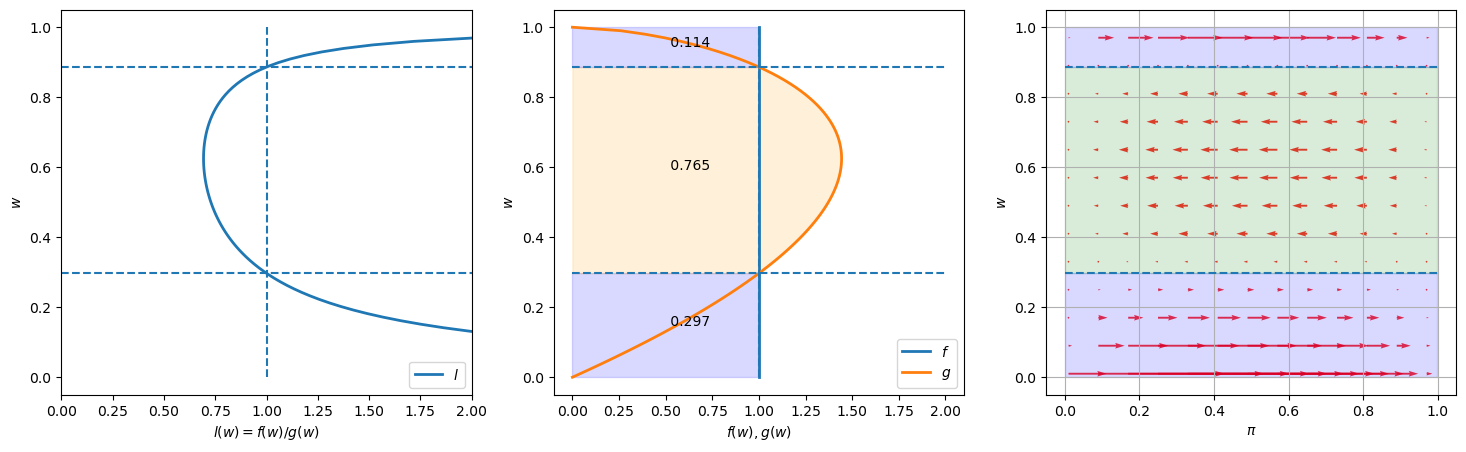

In [4]:
learning_example(G_a=2, G_b=1.6)

Notice how the likelihood ratio, the middle graph, and the arrows compare with the previous instance of our example.

## Appendix

### Sample Paths of $\pi_t$

Now we'll have some fun by plotting multiple realizations of sample paths of $\pi_t$ under two possible
assumptions about nature's choice of distribution, namely

- that nature permanently draws from $F$
- that nature permanently draws from $G$

Outcomes depend on a peculiar property of likelihood ratio processes  discussed in
[this lecture](https://python-advanced.quantecon.org/additive_functionals.html).

To proceed, we create some Python code.

In [5]:
def function_factory(F_a=1, F_b=1, G_a=3, G_b=1.2):

    # define f and g
    f = njit(lambda x: p(x, F_a, F_b))
    g = njit(lambda x: p(x, G_a, G_b))

    @njit
    def update(a, b, π):
        "Update π by drawing from beta distribution with parameters a and b"

        # Draw
        w = np.random.beta(a, b)

        # Update belief
        π = 1 / (1 + ((1 - π) * g(w)) / (π * f(w)))

        return π

    @njit
    def simulate_path(a, b, T=50):
        "Simulates a path of beliefs π with length T"

        π = np.empty(T+1)

        # initial condition
        π[0] = 0.5

        for t in range(1, T+1):
            π[t] = update(a, b, π[t-1])

        return π

    def simulate(a=1, b=1, T=50, N=200, display=True):
        "Simulates N paths of beliefs π with length T"

        π_paths = np.empty((N, T+1))
        if display:
            fig = plt.figure()

        for i in range(N):
            π_paths[i] = simulate_path(a=a, b=b, T=T)
            if display:
                plt.plot(range(T+1), π_paths[i], color='b', lw=0.8, alpha=0.5)

        if display:
            plt.show()

        return π_paths

    return simulate

In [6]:
simulate = function_factory()

We begin by generating $N$ simulated $\{\pi_t\}$ paths with $T$
periods when the sequence is truly IID draws from $F$. We set an initial prior $\pi_{-1} = .5$.

In [7]:
T = 50

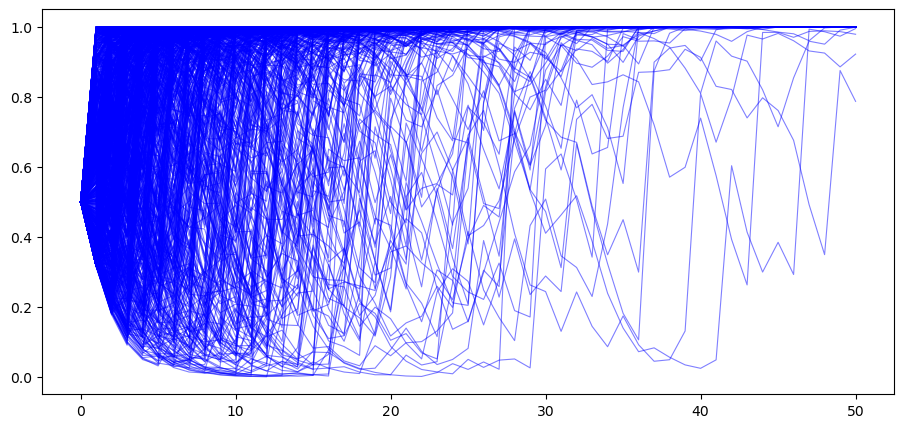

In [8]:
# when nature selects F
π_paths_F = simulate(a=1, b=1, T=T, N=1000)

In the above example,  for most paths $\pi_t \rightarrow 1$. 

So Bayes' Law evidently eventually
discovers the truth for most of our paths.

Next, we generate paths with $T$
periods when the sequence is truly IID draws from $G$. Again, we set the initial prior $\pi_{-1} = .5$.

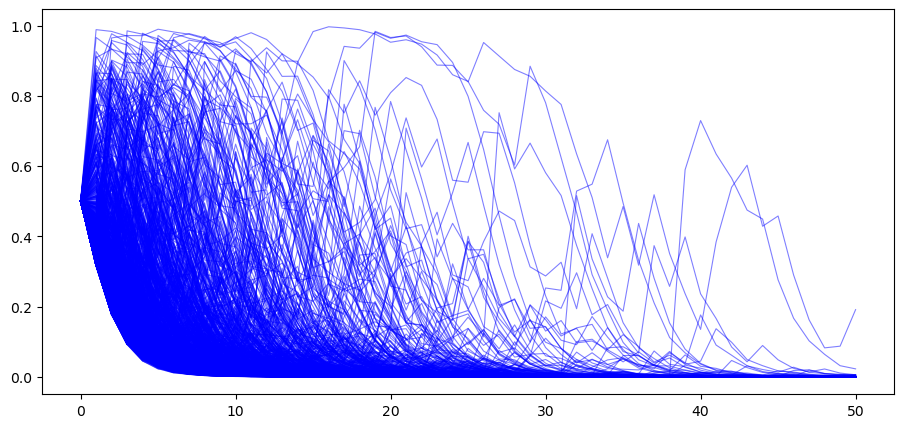

In [9]:
# when nature selects G
π_paths_G = simulate(a=3, b=1.2, T=T, N=1000)

In the above graph we observe that now  most paths $\pi_t \rightarrow 0$.

### Rates of convergence

We study rates of  convergence of $\pi_t$ to $1$ when nature generates the data as IID draws from $F$
and of convergence of $\pi_t$ to $0$ when nature generates  IID draws from $G$.

We do this by averaging across simulated paths of $\{\pi_t\}_{t=0}^T$.

Using   $N$ simulated $\pi_t$ paths, we compute
$1 - \sum_{i=1}^{N}\pi_{i,t}$ at each $t$ when the data are generated as draws from  $F$
and compute $\sum_{i=1}^{N}\pi_{i,t}$ when the data are generated as draws from $G$.

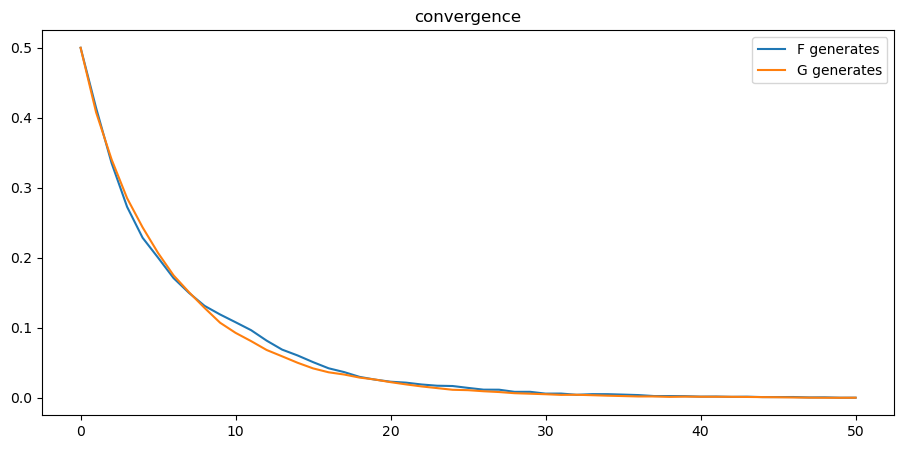

In [10]:
plt.plot(range(T+1), 1 - np.mean(π_paths_F, 0), label='F generates')
plt.plot(range(T+1), np.mean(π_paths_G, 0), label='G generates')
plt.legend()
plt.title("convergence");

From the above graph, rates of convergence appear not to depend on whether $F$ or $G$ generates the data.

### Graph of Ensemble Dynamics of $\pi_t$

More insights about the dynamics of $\{\pi_t\}$ can be gleaned by computing 
conditional expectations of $\frac{\pi_{t+1}}{\pi_{t}}$ as functions of $\pi_t$ via integration with respect
to the pertinent probability distribution:

$$
\begin{aligned}
E\left[\frac{\pi_{t+1}}{\pi_{t}}\biggm|q=a, \pi_{t}\right] &=E\left[\frac{l\left(w_{t+1}\right)}{\pi_{t}l\left(w_{t+1}\right)+\left(1-\pi_{t}\right)}\biggm|q= a, \pi_{t}\right], \\
    &=\int_{0}^{1}\frac{l\left(w_{t+1}\right)}{\pi_{t}l\left(w_{t+1}\right)+\left(1-\pi_{t}\right)} a\left(w_{t+1}\right)dw_{t+1}
\end{aligned}
$$

where $a =f,g$.

The following code approximates the integral above:

In [11]:
def expected_ratio(F_a=1, F_b=1, G_a=3, G_b=1.2):

    # define f and g
    f = njit(lambda x: p(x, F_a, F_b))
    g = njit(lambda x: p(x, G_a, G_b))

    l = lambda w: f(w) / g(w)
    integrand_f = lambda w, π: f(w) * l(w) / (π * l(w) + 1 - π)
    integrand_g = lambda w, π: g(w) * l(w) / (π * l(w) + 1 - π)

    π_grid = np.linspace(0.02, 0.98, 100)

    expected_rario = np.empty(len(π_grid))
    for q, inte in zip(["f", "g"], [integrand_f, integrand_g]):
        for i, π in enumerate(π_grid):
            expected_rario[i]= quad(inte, 0, 1, args=(π,))[0]
        plt.plot(π_grid, expected_rario, label=f"{q} generates")

    plt.hlines(1, 0, 1, linestyle="--")
    plt.xlabel("$π_t$")
    plt.ylabel("$E[\pi_{t+1}/\pi_t]$")
    plt.legend()

    plt.show()

First, consider the case where $F_a=F_b=1$ and
$G_a=3, G_b=1.2$.

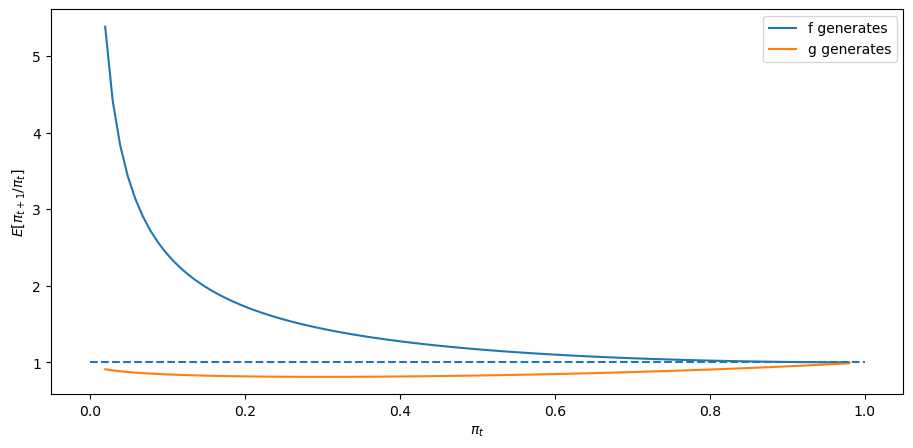

In [12]:
expected_ratio()

The above graphs shows that when $F$ generates the data, $\pi_t$ on average always heads north, while
when $G$ generates the data, $\pi_t$ heads south.

Next, we'll look at a degenerate case in whcih  $f$ and $g$ are identical beta
distributions, and $F_a=G_a=3, F_b=G_b=1.2$.

In a sense, here  there
is nothing to learn.

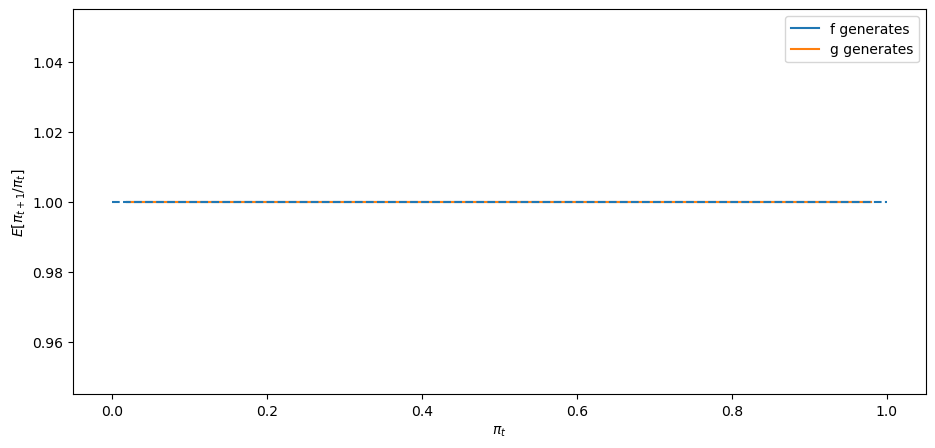

In [13]:
expected_ratio(F_a=3, F_b=1.2)

The above graph says that $\pi_t$ is inert and  remains at its initial value.

Finally, let's look at a case in which  $f$ and $g$ are neither very
different nor identical, in particular one in which  $F_a=2, F_b=1$ and
$G_a=3, G_b=1.2$.

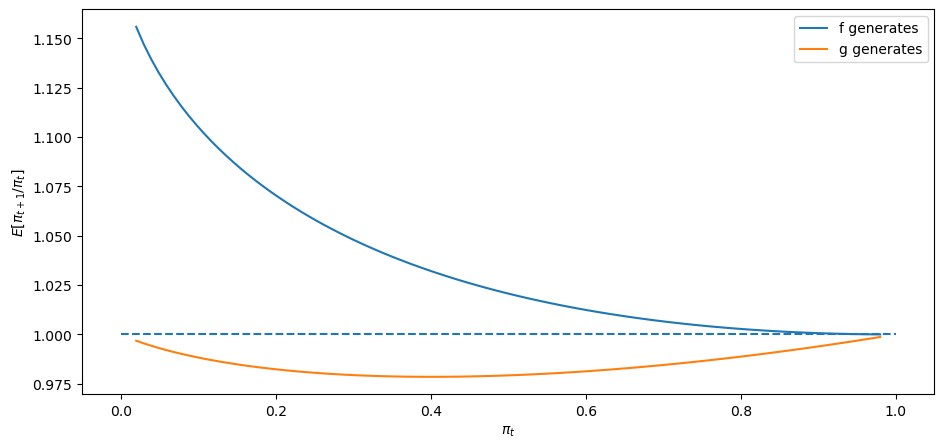

In [14]:
expected_ratio(F_a=2, F_b=1, G_a=3, G_b=1.2)

## Sequels

We'll apply and dig deeper into some of the ideas presented in this lecture:

* {doc}`this lecture <likelihood_ratio_process>` describes **likelihood ratio processes**
  and their role in frequentist and Bayesian statistical theories
* {doc}`this lecture <navy_captain>` studies  whether a World War II US Navy Captain's hunch that a (frequentist) decision rule that the Navy had told 
  him to use was  inferior to a sequential rule that Abraham
  Wald had not yet designed.